In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import soundfile
import numpy as np
import pandas as pd
import librosa
import glob
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

new_model = keras.models.load_model('/content/drive/MyDrive/Best_model')

In [ ]:

def normalize(audio):
  return(audio * (1/max(audio)))

def silence_suppression(X):
  for i in range(len(X)):
    if(X[i]!=0):
      break
  X = X[i:]

  for i in range(len(X)-1,0,-1):
    if(X[i]!=0):
      break
  X = X[:i]

  return(X)

def pred_from_large_file(file_name):
    with soundfile.SoundFile(file_name) as sound_file:
      X,sample_rate = librosa.load(file_name)
      X  = X[:,0] if len(X.shape)>1 else X

      X = silence_suppression(X)
      if(len(X)%(3*sample_rate)!=0):
        requ_padding = 3*sample_rate - len(X)%(3*sample_rate)
        X = (np.append(X,np.zeros(requ_padding)))

      data_list = []
      for i in range(0,len(X),3*sample_rate):
        data_list.append(X[i:i+3*sample_rate+1])

      #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20).T, axis=0)
      X_data = np.array([(librosa.feature.mfcc(y=i, sr=sample_rate, n_mfcc=20).T).flatten() for i in data_list])
      print(X_data[0].shape)
      return(new_model.predict(X_data))

In [ ]:
def balance_ouput(i):
  new_arr = [0 for i in range(len(i))]
  new_arr[0] = i[4]
  new_arr[1] = (i[3]+i[6])/10**48
  new_arr[2] = i[0]
  new_arr[3] = i[1]
  new_arr[4] = (i[2]+i[7])/10**10
  return(new_arr)

def balance_emotion(data):
  new_data = [sum(data[:i+1])/(i+1) for i in range(len(data))]
  return(new_data)

(2600,)
1/1 [==============================] - 0s 313ms/step


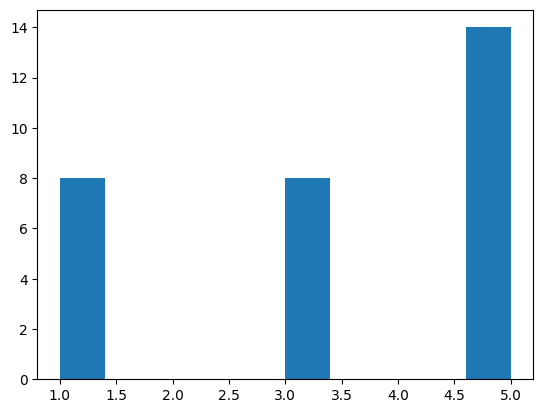

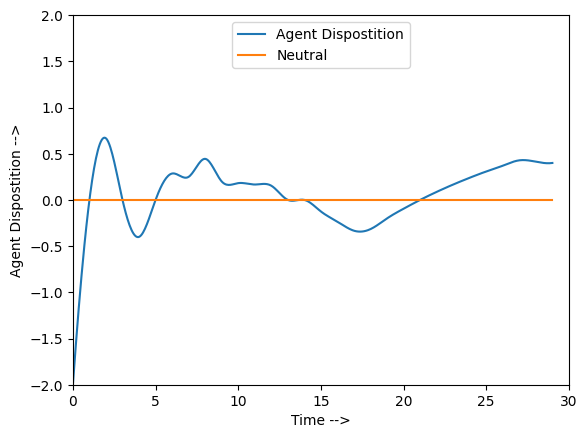

0.3999999999999999

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Water-works-Agent.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Agent Dispostition -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Agent Dispostition")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 97ms/step


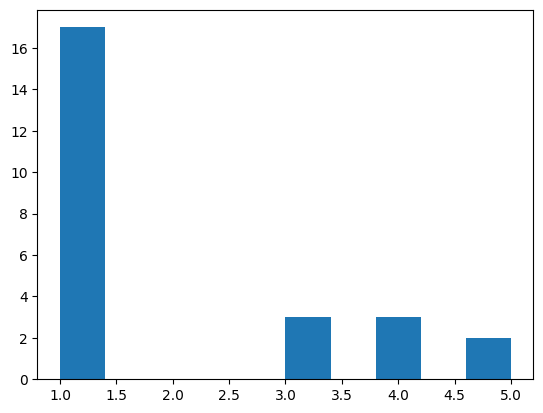

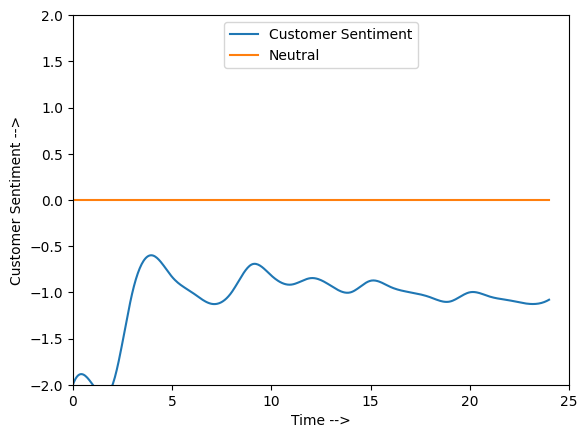

-1.08

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Water-works-Angry-Customer.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Customer Sentiment -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Customer Sentiment")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
2/2 [==============================] - 0s 13ms/step


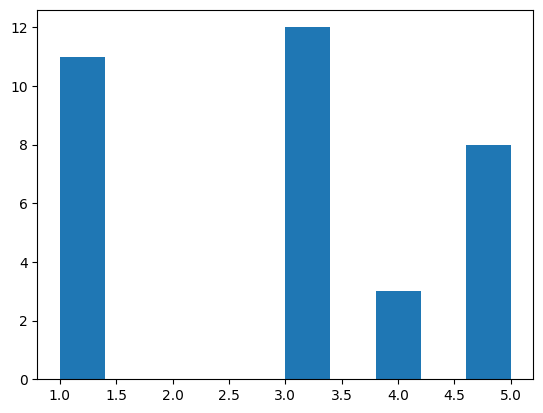

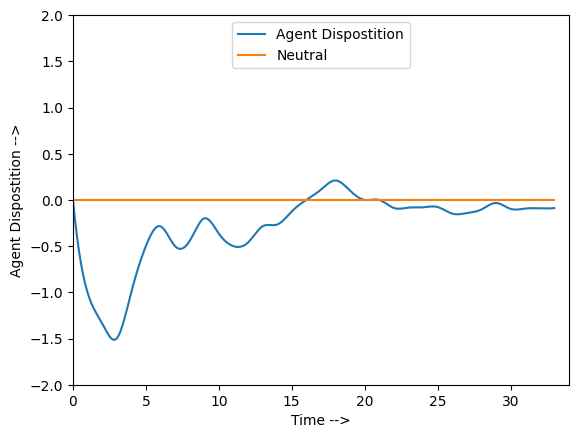

-0.08823529411764719

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Airlines-Transport-Agent.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Agent Dispostition -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Agent Dispostition")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 182ms/step


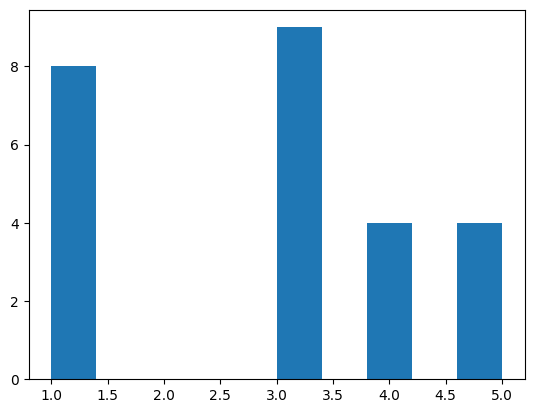

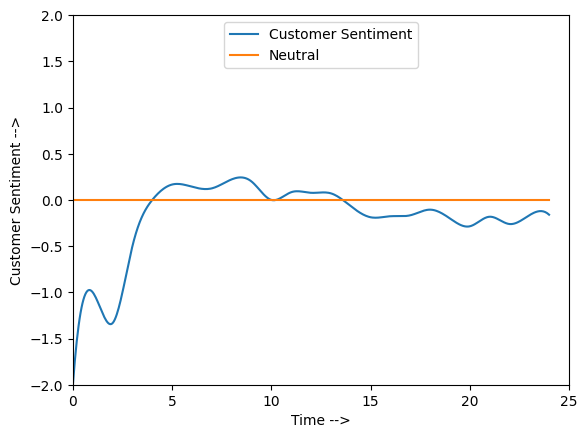

-0.16000000000000014

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Airlines-customer-without-Shouting_.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Customer Sentiment -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Customer Sentiment")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 114ms/step


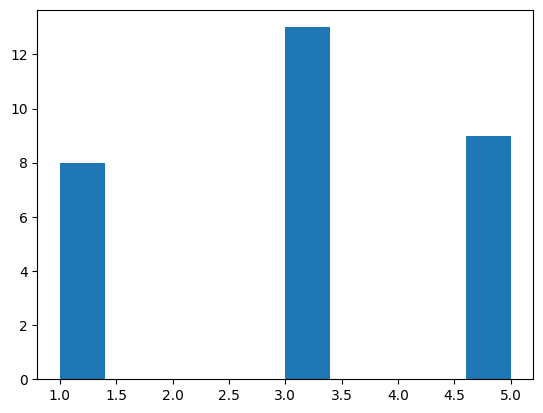

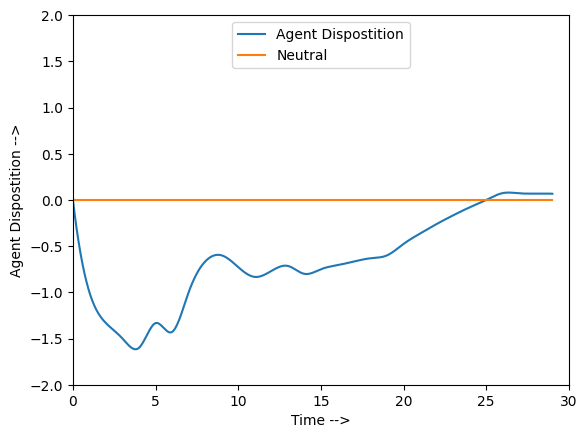

0.06666666666666687

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Water-Transport-Agent.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Agent Dispostition -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Agent Dispostition")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 147ms/step


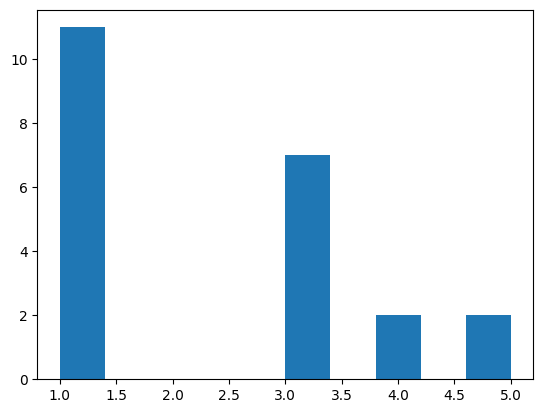

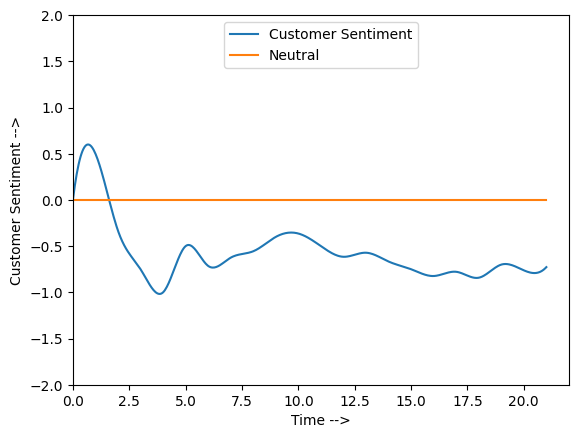

-0.7272727272727271

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Water-Transport-Customer.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Customer Sentiment -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Customer Sentiment")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 125ms/step


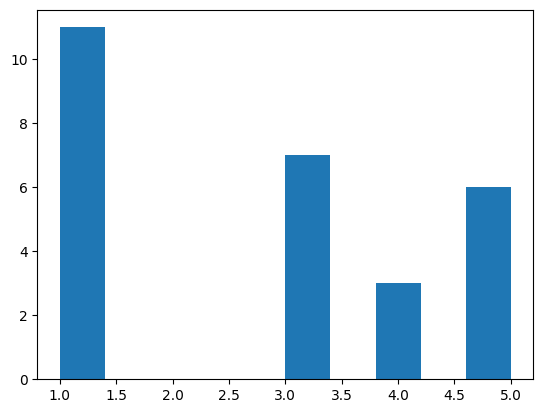

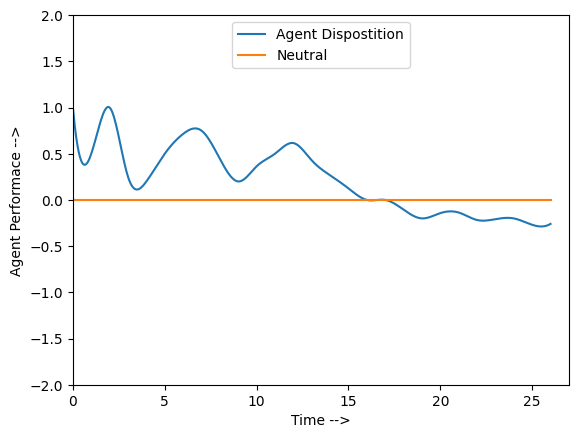

-0.2592592592592591

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Healthcare-Agent.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Agent Performace -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Agent Dispostition")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3

(2600,)
1/1 [==============================] - 0s 84ms/step


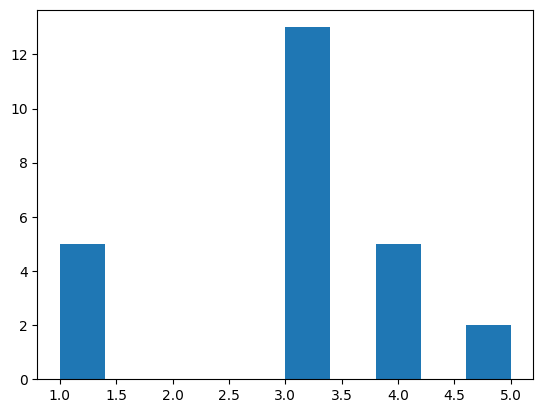

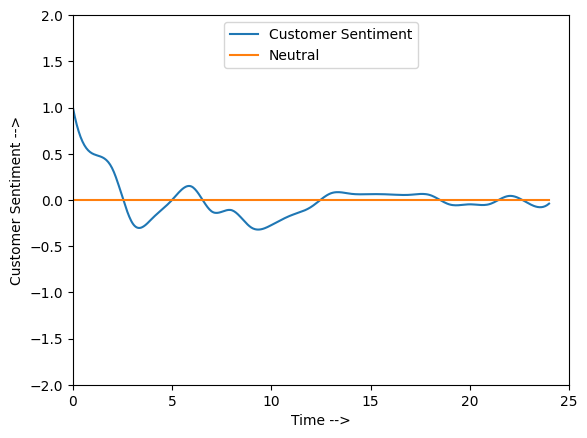

-0.040000000000000036

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline
import numpy as np

filename = "/content/Healthcare-customer.wav"
data = []
for i in pred_from_large_file(filename):
  data.append(np.argmax(balance_ouput(i))+1)


plt.hist(data)
plt.show()

x = np.array(range(len(data)))
y = np.array(balance_emotion(data))

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.xlabel("Time -->")
plt.ylabel("Customer Sentiment -->")
plt.ylim(-2,2)
plt.xlim(0,max(X_)+1)
# Plotting the Graph
plt.plot(X_, Y_-3,label="Customer Sentiment")
plt.plot([max(X_), 0], [ 0, 0],label="Neutral")
leg = plt.legend(loc='upper center')
plt.show()
Y_[-1]-3